In [464]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc

In [465]:
IMAGE_SIZE = (28, 28)

def load_images_from_folder(folder):
    images = []
    labels = []
    for label in ['0', '1']:
        class_folder = os.path.join(folder, label)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv2.resize(img, IMAGE_SIZE)
                img_flattened = img_resized.flatten()
                images.append(img_flattened)
                labels.append(int(label))
    return np.array(images), np.array(labels)

In [466]:
train_images, train_labels = load_images_from_folder('train')
test_images, test_labels = load_images_from_folder('test')

In [467]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

Training data shape: (2372, 784)
Training labels shape: (2372,)
Testing data shape: (336, 784)
Testing labels shape: (336,)


In [468]:
scaler = StandardScaler()

In [469]:
train_images = scaler.fit_transform(train_images)

In [470]:
test_images = scaler.transform(test_images)

In [471]:
lr_model = LogisticRegression(max_iter=1000)

In [472]:
lr_model.fit(train_images,train_labels)

LogisticRegression(max_iter=1000)

In [473]:
lr_pred = lr_model.predict(test_images)

In [474]:
accuracy_score(test_labels, lr_pred)

0.5744047619047619

In [475]:
confusion_matrix(test_labels,lr_pred)

array([[149,  59],
       [ 84,  44]])

In [476]:
classification_report(test_labels,lr_pred)

'              precision    recall  f1-score   support\n\n           0       0.64      0.72      0.68       208\n           1       0.43      0.34      0.38       128\n\n    accuracy                           0.57       336\n   macro avg       0.53      0.53      0.53       336\nweighted avg       0.56      0.57      0.56       336\n'

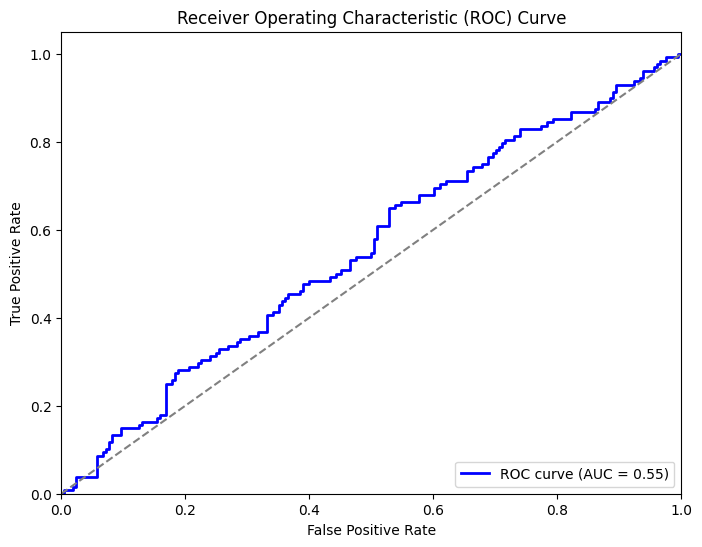

In [477]:

y_probs = lr_model.predict_proba(test_images)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [478]:
knn_model = KNeighborsClassifier(n_neighbors=7)

In [479]:
knn_model.fit(train_images,train_labels)

KNeighborsClassifier(n_neighbors=7)

In [480]:
knn_pred = knn_model.predict(test_images)

In [481]:
accuracy_score(test_labels,knn_pred)

0.6130952380952381

In [482]:
confusion_matrix(test_labels,knn_pred)

array([[184,  24],
       [106,  22]])

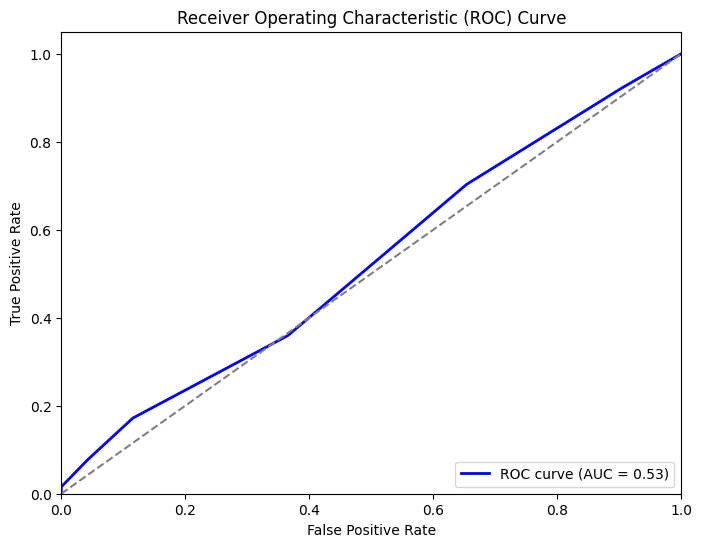

In [483]:
y_probs = knn_model.predict_proba(test_images)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

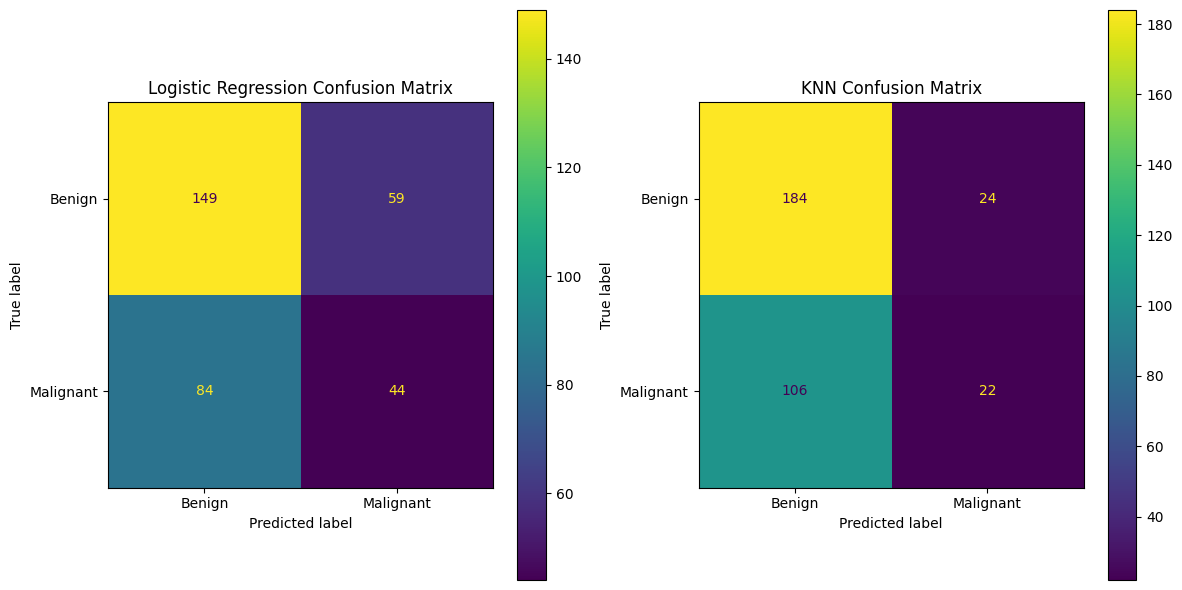

In [484]:
plt.figure(figsize=(12, 6))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
ConfusionMatrixDisplay(confusion_matrix(test_labels, lr_pred), display_labels=['Benign', 'Malignant']).plot(ax=plt.gca())
plt.title('Logistic Regression Confusion Matrix')

# KNN Confusion Matrix
plt.subplot(1, 2, 2)
ConfusionMatrixDisplay(confusion_matrix(test_labels, knn_pred), display_labels=['Benign', 'Malignant']).plot(ax=plt.gca())
plt.title('KNN Confusion Matrix')

plt.tight_layout()
plt.show()


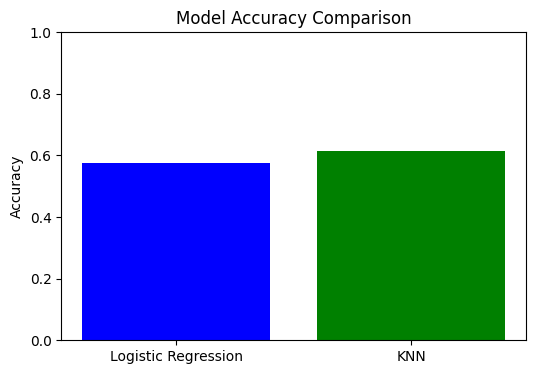

In [485]:
lr_accuracy = accuracy_score(test_labels, lr_pred)
knn_accuracy = accuracy_score(test_labels, knn_pred)
# Plot Accuracy Comparison
plt.figure(figsize=(6, 4))
models = ['Logistic Regression', 'KNN']
accuracies = [lr_accuracy, knn_accuracy]
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


Sample Logistic Regression Predictions:


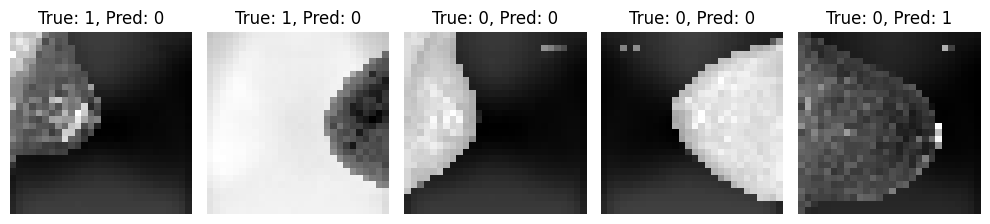

Sample KNN Predictions:


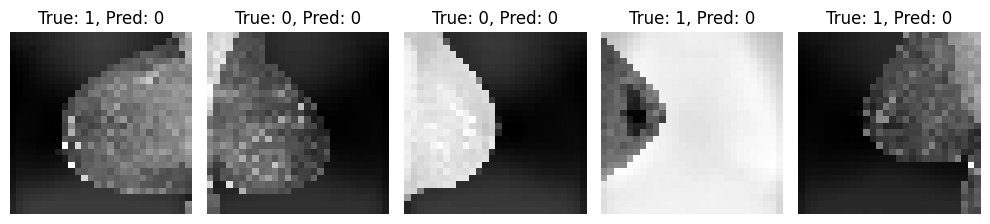

In [486]:
# Display Sample Images with Predictions
def display_sample_images(images, true_labels, pred_labels, n=5):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        index = np.random.randint(0, len(images))
        img = images[index].reshape(IMAGE_SIZE)
        true_label = true_labels[index]
        pred_label = pred_labels[index]
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Sample Logistic Regression Predictions:")
display_sample_images(test_images, test_labels, lr_pred)

print("Sample KNN Predictions:")
display_sample_images(test_images, test_labels, knn_pred)